In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 


import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')


Num GPUs Available:  1


2022-07-25 12:27:16.381782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 12:27:16.467272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-25 12:27:16.468049: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [20]:
#define image dataset 
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=(176,208), 
                                                 subset="validation",
                                                 class_mode='categorical')

image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory='/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test',
                                                 shuffle=False,
                                                 target_size=(176,208), 
                                                 class_mode=None)


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


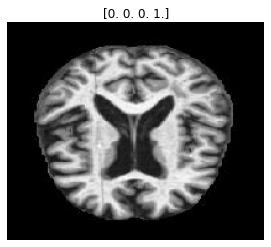

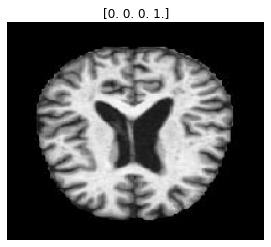

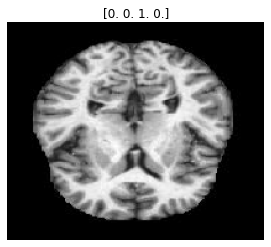

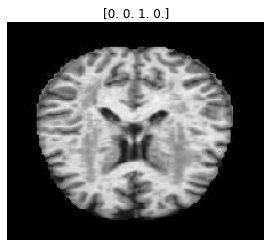

In [21]:
#show flwoers for the first batch

batch_1_img = train_dataset[0]
for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

## ANN

In [47]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [176,208,3]),                             
keras.layers.Dense(300, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])

model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
513/513 [==============================] - 10s 18ms/step - loss: 1.5503 - auc: 0.7512 - val_loss: 1.0460 - val_auc: 0.7804
Epoch 2/50
513/513 [==============================] - 9s 18ms/step - loss: 1.0400 - auc: 0.7815 - val_loss: 1.0349 - val_auc: 0.7804
Epoch 3/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0404 - auc: 0.7784 - val_loss: 1.0399 - val_auc: 0.7803
Epoch 4/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0410 - auc: 0.7795 - val_loss: 1.0376 - val_auc: 0.7804
Epoch 5/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0411 - auc: 0.7787 - val_loss: 1.0361 - val_auc: 0.7804


In [48]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

128/128 [==============================] - 2s 13ms/step - loss: 1.0349 - auc: 0.7804
Loss:  1.0348925590515137
Accuracy:  0.7803845405578613


In [44]:
#simple ann with 3 layers 
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [176,208,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])


model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True)

In [45]:
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)
#save model
#data manipulation 
#include graphs 

Epoch 1/50
513/513 [==============================] - 10s 18ms/step - loss: 1.8142 - auc: 0.7447 - val_loss: 1.3756 - val_auc: 0.6688
Epoch 2/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0426 - auc: 0.7788 - val_loss: 1.0348 - val_auc: 0.7804
Epoch 3/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0405 - auc: 0.7808 - val_loss: 1.0432 - val_auc: 0.7804
Epoch 4/50
513/513 [==============================] - 9s 18ms/step - loss: 1.0408 - auc: 0.7788 - val_loss: 1.0373 - val_auc: 0.7804
Epoch 5/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0407 - auc: 0.7777 - val_loss: 1.0366 - val_auc: 0.7804
Epoch 6/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0390 - auc: 0.7801 - val_loss: 1.0345 - val_auc: 0.7804
Epoch 7/50
513/513 [==============================] - 9s 17ms/step - loss: 1.0399 - auc: 0.7793 - val_loss: 1.0349 - val_auc: 0.7804
Epoch 8/50
513/513 [==============================] - 9s 17ms/step -

In [46]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

128/128 [==============================] - 2s 14ms/step - loss: 1.0345 - auc: 0.7804
Loss:  1.0344537496566772
Accuracy:  0.7803845405578613


## CNN

In [36]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [176,208,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(4, activation ='softmax')])

In [37]:
model.compile(
        optimizer='adam',
        loss=tensorflow.losses.CategoricalCrossentropy(),
        metrics=[keras.metrics.AUC(name='auc')]
    )

In [38]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = keras.callbacks.ModelCheckpoint("alzheimer_model.h5",
                                                    save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [39]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
    epochs=100
)

Epoch 1/100
513/513 [==============================] - 14s 23ms/step - loss: 1.0998 - auc: 0.7754 - val_loss: 1.0783 - val_auc: 0.7566
Epoch 2/100
513/513 [==============================] - 12s 24ms/step - loss: 0.9947 - auc: 0.8042 - val_loss: 1.1635 - val_auc: 0.6885
Epoch 3/100
513/513 [==============================] - 12s 23ms/step - loss: 0.9772 - auc: 0.8103 - val_loss: 21.2372 - val_auc: 0.6772
Epoch 4/100
513/513 [==============================] - 11s 22ms/step - loss: 0.9793 - auc: 0.8086 - val_loss: 1.4753 - val_auc: 0.7903
Epoch 5/100
513/513 [==============================] - 13s 24ms/step - loss: 0.9820 - auc: 0.8115 - val_loss: 1.9593 - val_auc: 0.7418
Epoch 6/100
513/513 [==============================] - 11s 22ms/step - loss: 0.9714 - auc: 0.8120 - val_loss: 1.1083 - val_auc: 0.7320
Epoch 7/100
513/513 [==============================] - 12s 23ms/step - loss: 0.9734 - auc: 0.8126 - val_loss: 1.0128 - val_auc: 0.7968
Epoch 8/100
513/513 [==============================] -

In [40]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

128/128 [==============================] - 2s 13ms/step - loss: 0.9627 - auc: 0.8142
Loss:  0.962722897529602
Accuracy:  0.8142370581626892


## VGG19

In [56]:
vgg = VGG19(input_shape=(176,208,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 176, 208, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 176, 208, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 176, 208, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 88, 104, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 88, 104, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 88, 104, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 44, 52, 128)       0   

In [57]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [58]:
modelvgg.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
513/513 [==============================] - 18s 33ms/step - loss: 0.9635 - auc: 0.8554 - val_loss: 1.1335 - val_auc: 0.7931
Epoch 2/50
513/513 [==============================] - 17s 32ms/step - loss: 0.6243 - auc: 0.9298 - val_loss: 1.3211 - val_auc: 0.7538
Epoch 3/50
513/513 [==============================] - 17s 33ms/step - loss: 0.5445 - auc: 0.9465 - val_loss: 1.0832 - val_auc: 0.8350
Epoch 4/50
513/513 [==============================] - 17s 32ms/step - loss: 0.4203 - auc: 0.9679 - val_loss: 1.0850 - val_auc: 0.8587
Epoch 5/50
513/513 [==============================] - 17s 32ms/step - loss: 0.3722 - auc: 0.9751 - val_loss: 1.4838 - val_auc: 0.7618
Epoch 6/50
513/513 [==============================] - 17s 32ms/step - loss: 0.3786 - auc: 0.9736 - val_loss: 1.0563 - val_auc: 0.8556
Epoch 7/50
513/513 [==============================] - 16s 32ms/step - loss: 0.2511 - auc: 0.9892 - val_loss: 0.9724 - val_auc: 0.8577
Epoch 8/50
513/513 [==============================] - 17s 33ms

In [62]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

128/128 [==============================] - 3s 26ms/step - loss: 0.8116 - auc: 0.9147
Loss:  0.8115812540054321
Accuracy:  0.9146947264671326
